#**Heart Disease Prediction**





##Importing libraries

In [1]:
!pip install -q pydot

In [2]:
!pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn

##Loading Dataset

In [4]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


##Data Preprocessing

In [5]:
#Encoding or setting dummy values
def encode(df,column,positive):
  df=df.copy()
  df[column]=df[column].apply(lambda x:1 if x==positive else 0)
  return df

In [6]:
df=encode(df,'Heart Disease','Presence')

In [7]:
df.head(15)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


###Missing value detection

In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

###Extended Data Dictionary (EDD)

In [9]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


###Correlational Analysis

In [10]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [11]:
#splitting the dependent and independent variables
x=df.iloc[:,:13].values
y=df.iloc[:,13].values

In [12]:
#splitting train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Standardizating the data:**


>  Modifies the variance to 1 and mean to 0



In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

##**Model-1: DECISION TREE CLASSIFIER**

In [14]:
#model training:
from sklearn import tree
clstree=tree.DecisionTreeClassifier()
clstree.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
#prediction:
y_pred_train=clstree.predict(x_train)
y_pred_test=clstree.predict(x_test)
y_test,y_pred_test

(array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1]))

In [16]:
#model performance
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[25,  5],
       [ 5, 19]])

In [17]:
accuracy_score(y_test,y_pred_test)

0.8148148148148148

###PLOTTING THE DECISION TREE CLASSIFICATION:

In [18]:
df_train = pd.DataFrame(x_train)

In [19]:
data_plt=tree.export_graphviz(clstree,out_file=None,feature_names=df_train.columns,filled=True)

In [20]:
from IPython.display import Image

In [21]:
import pydotplus as pp

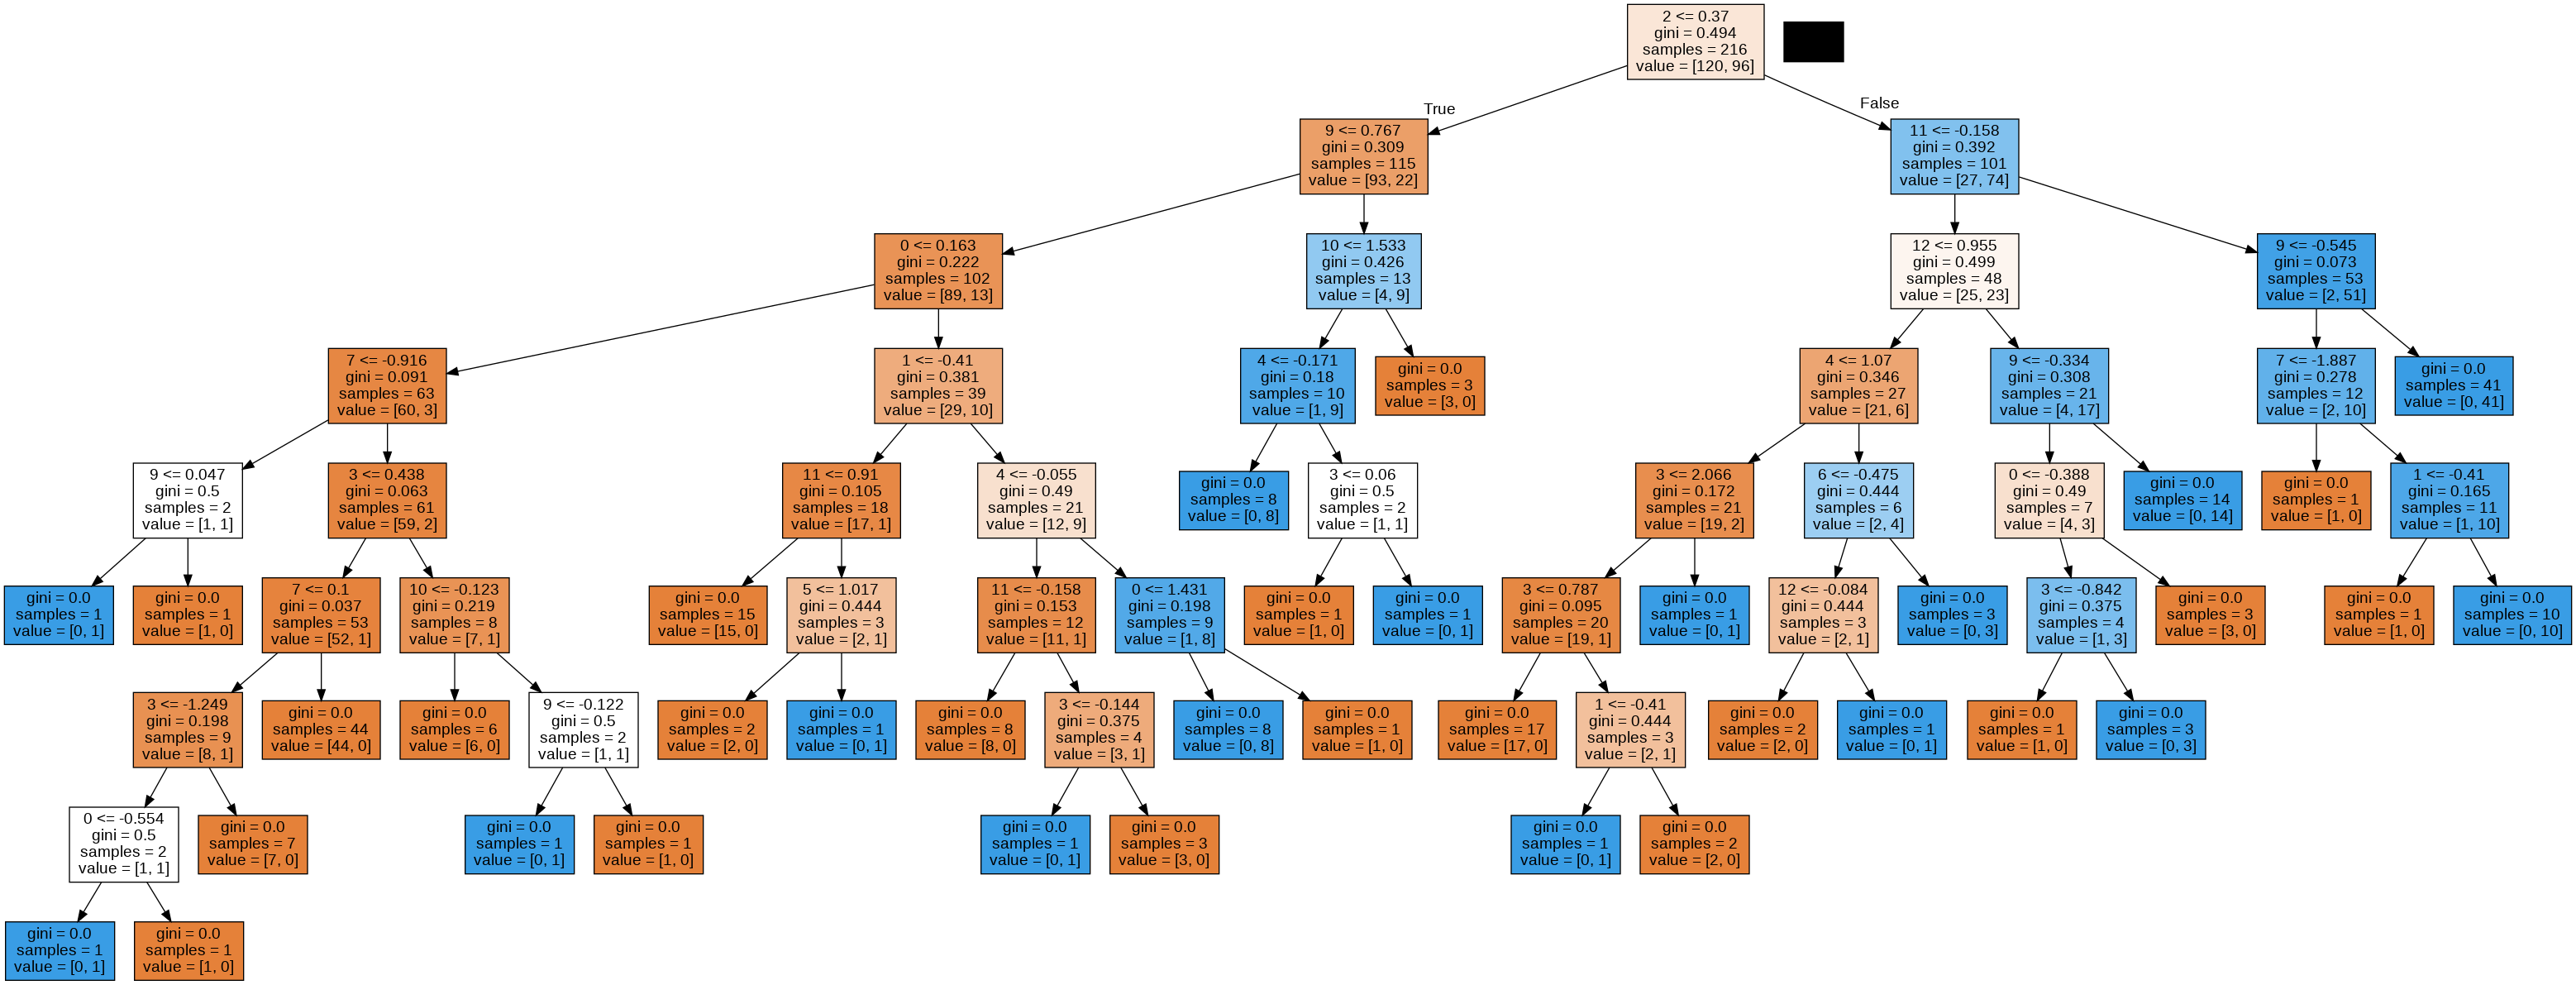

In [22]:
graph=pp.graph_from_dot_data(data_plt)
Image(graph.create_png())

**Controlling Tree growth**

In [23]:
clstree2=tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth=7)
clstree2.fit(x_train,y_train)
accuracy_score(y_test,clstree2.predict(x_test))

0.7777777777777778

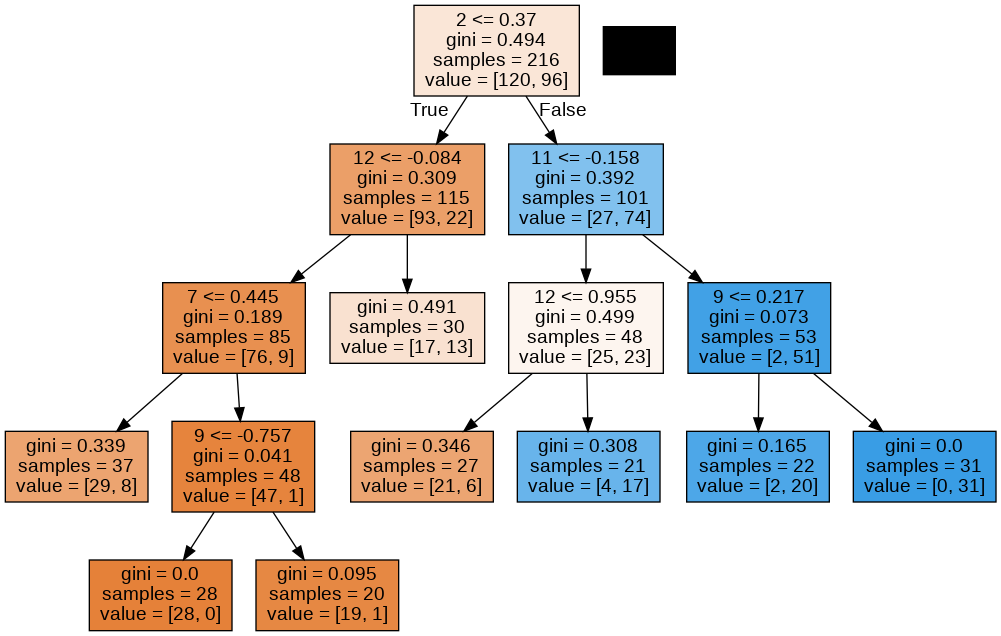

In [24]:
data_pltnew=tree.export_graphviz(clstree2,out_file=None,feature_names=df_train.columns,filled=True)
graph=pp.graph_from_dot_data(data_pltnew)
Image(graph.create_png())

##**Ensemble Techniques**

####**1.Bagging**

In [25]:
#model training
from sklearn.ensemble import BaggingClassifier
bagcls=BaggingClassifier(base_estimator=clstree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)
bagcls.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [26]:
#prediction
y_pred_bagclstest=bagcls.predict(x_test)
y_pred_bagclstest,y_test

(array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]))

In [27]:
#model performance
confusion_matrix(y_test,y_pred_bagclstest)

array([[25,  5],
       [ 5, 19]])

In [28]:
accuracy_score(y_test,y_pred_bagclstest)

0.8148148148148148

####**2.Random forest** 

In [29]:
#model training
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [30]:
#model prediction
y_test,rfc.predict(x_test)

(array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 0]))

In [31]:
#model performance
confusion_matrix(y_test,rfc.predict(x_test))

array([[25,  5],
       [ 7, 17]])

In [32]:
accuracy_score(y_test,rfc.predict(x_test))

0.7777777777777778

####Tuning Hyperparameters 
> to get the best parameters




In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
rfc=RandomForestClassifier(n_estimators=250,random_state=42)

In [35]:
param_grid={"max_features":[i for i in range(1,11)],"min_samples_split":[2,3,10]}

In [36]:
gridsearchcv = GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=-1,cv=5,scoring='accuracy')

In [37]:
#model training
gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [38]:
gridsearchcv.best_params_

{'max_features': 10, 'min_samples_split': 10}

In [39]:
rfcoptim=gridsearchcv.best_estimator_

In [40]:
#model prediction
y_test,rfcoptim.predict(x_test)

(array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1]))

In [41]:
#model performance
confusion_matrix(y_test,rfcoptim.predict(x_test))

array([[25,  5],
       [ 5, 19]])

In [42]:
accuracy_score(y_test,rfcoptim.predict(x_test))

0.8148148148148148

####**3. XGBoosting**

In [43]:
import xgboost as xg

In [44]:
#model training
xgbcls=xg.XGBClassifier(max_depth=5,n_estimators=10000,n_jobs=-1,learning_rate=0.3)
xgbcls.fit(x_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=10000, n_jobs=-1)

In [45]:
#model prediction
y_test,xgbcls.predict(x_test)

(array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1]))

In [46]:
#model performance
confusion_matrix(y_test,xgbcls.predict(x_test))

array([[24,  6],
       [ 5, 19]])

In [47]:
accuracy_score(y_test,xgbcls.predict(x_test))

0.7962962962962963

Feature of importance denotes the feature upon which the result is very much correlated

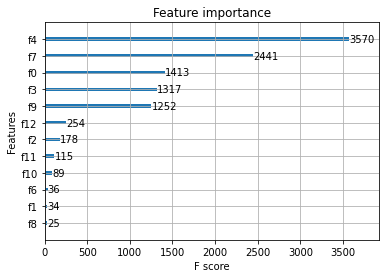

In [48]:
xg.plot_importance(xgbcls)

##**Model-2: SUPPORT VECTOR MACHINE**

In [49]:
#model training in support vector classifier
from sklearn import svm
#with linear kernel
svm_clsl=svm.SVC(kernel='linear',C=5)
svm_clsl.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [50]:
#model prediction
y_pred_svmcls=svm_clsl.predict(x_test)
y_test,y_pred_svmcls

(array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0]))

In [51]:
#model evaluation
confusion_matrix(y_test,y_pred_svmcls)

array([[25,  5],
       [ 9, 15]])

In [52]:
accuracy_score(y_test,y_pred_svmcls)

0.7407407407407407

In [53]:
#Number of support vectors
svm_clsl.n_support_

array([37, 37], dtype=int32)

###**Tuning Hyperparameters**

In [54]:
params_svm={'C':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,15,100,500,1000]}

In [55]:
svm_clsp=svm.SVC(kernel='poly')

In [56]:
gscv=GridSearchCV(svm_clsp,param_grid=params_svm,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')

In [57]:
gscv.fit(x_train,y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15,
                               100, 500, 1000]},
             scoring='accuracy', verbose=1)

In [58]:
#model evaluation
confusion_matrix(y_test,gscv.predict(x_test))

array([[28,  2],
       [ 8, 16]])

In [59]:
accuracy_score(y_test,gscv.predict(x_test))

0.8148148148148148

##**Model-3: LOGISTIC REGRESSION**

In [60]:
#model training
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [61]:
#model prediction
y_pred_lortrain=lor.predict(x_train)
y_pred_lortest=lor.predict(x_test)
y_test,y_pred_lortest

(array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0]))

In [62]:
#model performance
confusion_matrix(y_test,y_pred_lortest)

array([[25,  5],
       [ 9, 15]])

In [63]:
accuracy_score(y_test,y_pred_lortest)

0.7407407407407407

##**Model-4: K-NEIGHBORS** 

In [64]:
#model training
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)
#model prediction and performance
y_pred_knctest=knc.predict(x_test)
accuracy_score(y_test,y_pred_knctest)

0.7592592592592593

####Tuning of hyperparameters

In [65]:
params={'n_neighbors':[i for i in range(1,11)]}
params

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [66]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [67]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [68]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [69]:
optimized_knc=grid_search_cv.best_estimator_

In [70]:
y_pred_opknc=optimized_knc.predict(x_test)

In [71]:
#model evaluation
confusion_matrix(y_test,y_pred_opknc)

array([[27,  3],
       [ 8, 16]])

In [72]:
accuracy_score(y_test,y_pred_opknc)

0.7962962962962963

for the Heart prediction dataset we used, svm model and decision tree with bagging,random forest ensemble give the highest accuracy of prediction